# Sparse Hebbian Learning with full homeostasis : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence the way we select dictionary elements and thus the homeostasis.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'rescaling'

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_Pcum']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']

In [4]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!ls -l {experiments.shl.cache_dir}/{tag}*lock*

ls: {experiments.shl.data_cache}/{tag}*: No such file or directory
ls: {experiments.shl.data_cache}/{tag}*lock*: No such file or directory


## different rescaling values

Extracting data..loading the data called : cache_dir/data_data
Data is of shape : (65520, 324) - done in 0.17s.
No cache found cache_dir/rescaling - C=0.75000_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  33 /   1025 (elapsed time:  56s,   0mn  56s)
Iteration  65 /   1025 (elapsed time:  111s,   1mn  51s)
Iteration  97 /   1025 (elapsed time:  165s,   2mn  45s)
Iteration  129 /   1025 (elapsed time:  220s,   3mn  40s)
Iteration  161 /   1025 (elapsed time:  275s,   4mn  35s)
Iteration  193 /   1025 (elapsed time:  331s,   5mn  31s)
Iteration  225 /   1025 (elapsed time:  387s,   6mn  27s)
Iteration  257 /   1025 (elapsed time:  442s,   7mn  22s)
Iteration  289 /   1025 (elapsed time:  498s,   8mn  18s)
Iteration  321 /   1025 (elapsed time:  553s,   9mn  13s)
Iteration  353 /   1025 (elapsed time:  607s,  10mn   7s)
Iteration  385 /   1025 (elapsed time:  661s,  11mn   1s)


Iteration  833 /   1025 (elapsed time:  1323s,  22mn   3s)
Iteration  865 /   1025 (elapsed time:  1375s,  22mn  55s)
Iteration  897 /   1025 (elapsed time:  1428s,  23mn  48s)
Iteration  929 /   1025 (elapsed time:  1480s,  24mn  40s)
Iteration  961 /   1025 (elapsed time:  1533s,  25mn  33s)
Iteration  993 /   1025 (elapsed time:  1586s,  26mn  26s)
Iteration  1025 /   1025 (elapsed time:  1639s,  27mn  19s)
done in 1642.91s.
loading the dico called : cache_dir/rescaling - C=2.12132_dico.pkl
No cache found cache_dir/rescaling - C=3.00000_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   2s,   0mn   2s)
Iteration  33 /   1025 (elapsed time:  55s,   0mn  55s)
Iteration  65 /   1025 (elapsed time:  107s,   1mn  47s)
Iteration  97 /   1025 (elapsed time:  160s,   2mn  40s)
Iteration  129 /   1025 (elapsed time:  212s,   3mn  32s)
Iteration  161 /   1025 (elapsed time:  264s,   4mn  24s)
Iteration  193 /   

Iteration  641 /   1025 (elapsed time:  920s,  15mn  20s)
Iteration  673 /   1025 (elapsed time:  966s,  16mn   6s)
Iteration  705 /   1025 (elapsed time:  1011s,  16mn  51s)
Iteration  737 /   1025 (elapsed time:  1056s,  17mn  36s)
Iteration  769 /   1025 (elapsed time:  1102s,  18mn  22s)
Iteration  801 /   1025 (elapsed time:  1148s,  19mn   8s)
Iteration  833 /   1025 (elapsed time:  1193s,  19mn  53s)
Iteration  865 /   1025 (elapsed time:  1239s,  20mn  39s)
Iteration  897 /   1025 (elapsed time:  1285s,  21mn  25s)
Iteration  929 /   1025 (elapsed time:  1331s,  22mn  11s)
Iteration  961 /   1025 (elapsed time:  1377s,  22mn  57s)
Iteration  993 /   1025 (elapsed time:  1423s,  23mn  43s)
Iteration  1025 /   1025 (elapsed time:  1469s,  24mn  29s)
done in 1472.73s.
loading the dico called : cache_dir/rescaling - C=8.48528_dico.pkl
No cache found cache_dir/rescaling - C=12.00000_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteratio

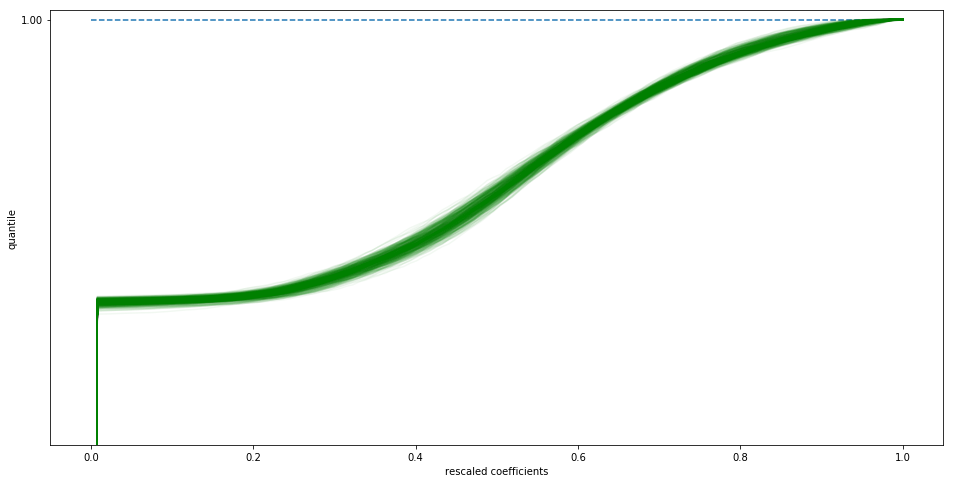

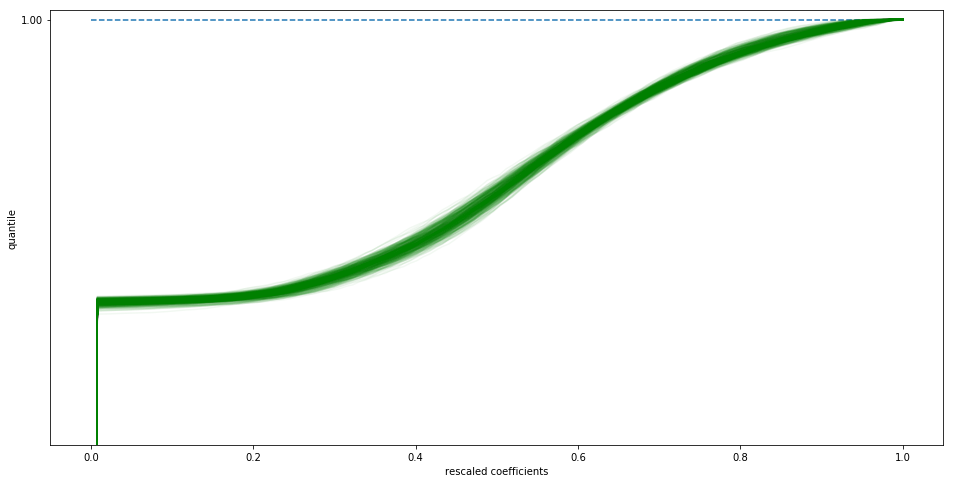

loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl


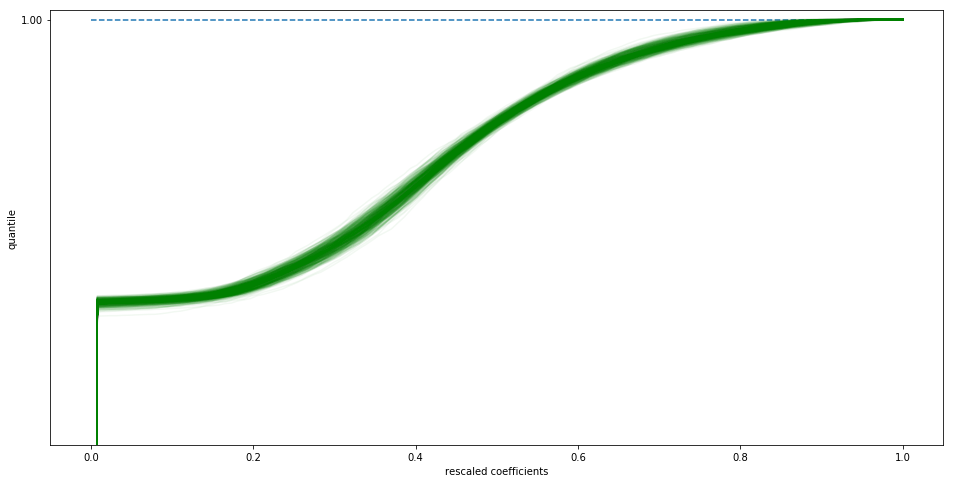

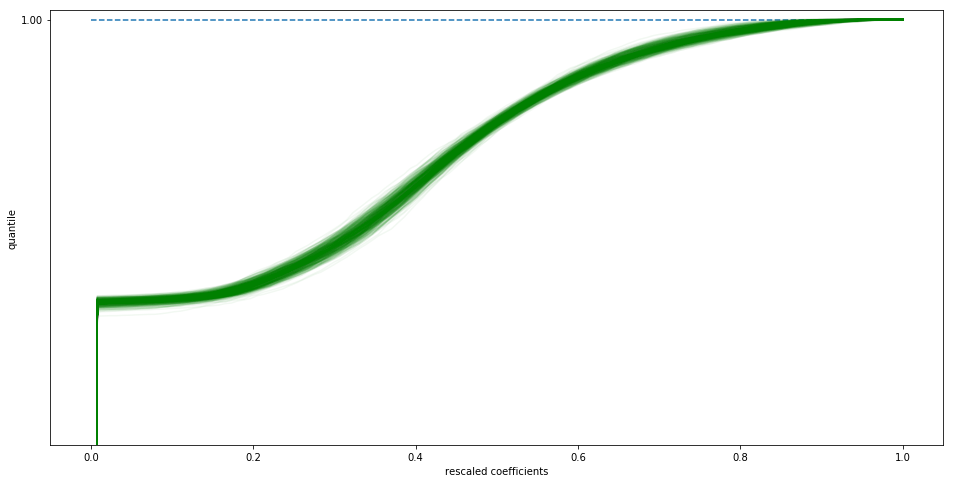

loading the dico called : cache_dir/rescaling - C=1.50000_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.50000_dico.pkl


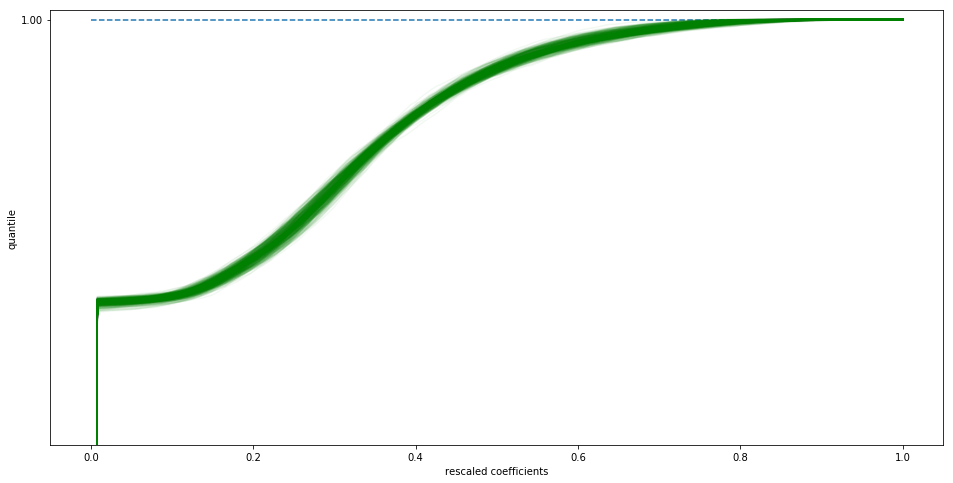

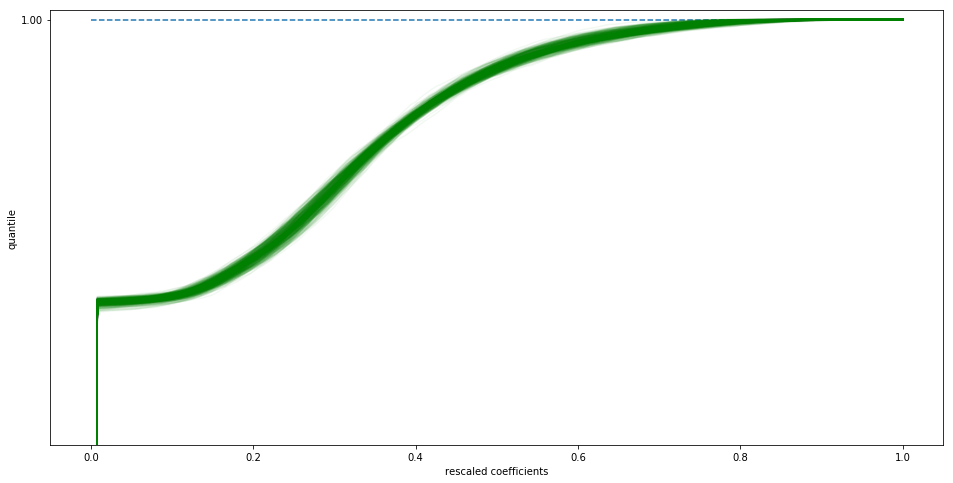

loading the dico called : cache_dir/rescaling - C=2.12132_dico.pkl
loading the dico called : cache_dir/rescaling - C=2.12132_dico.pkl


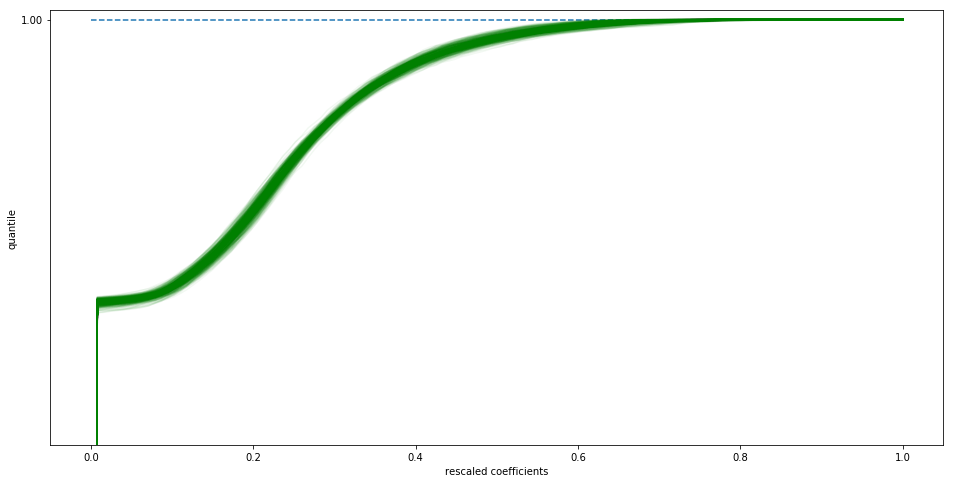

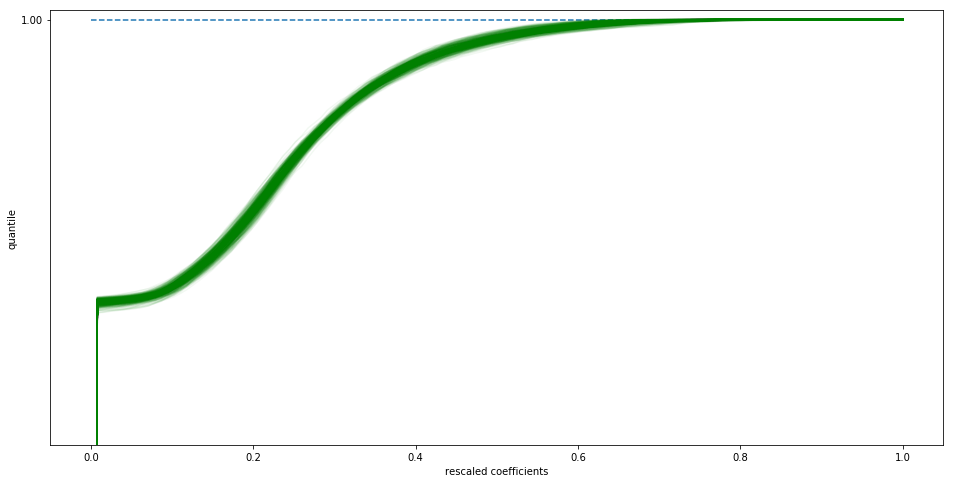

loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl


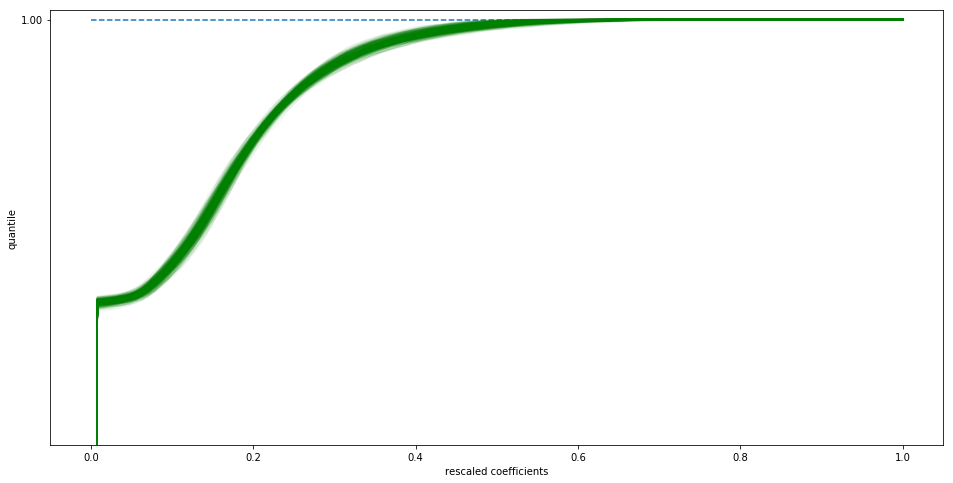

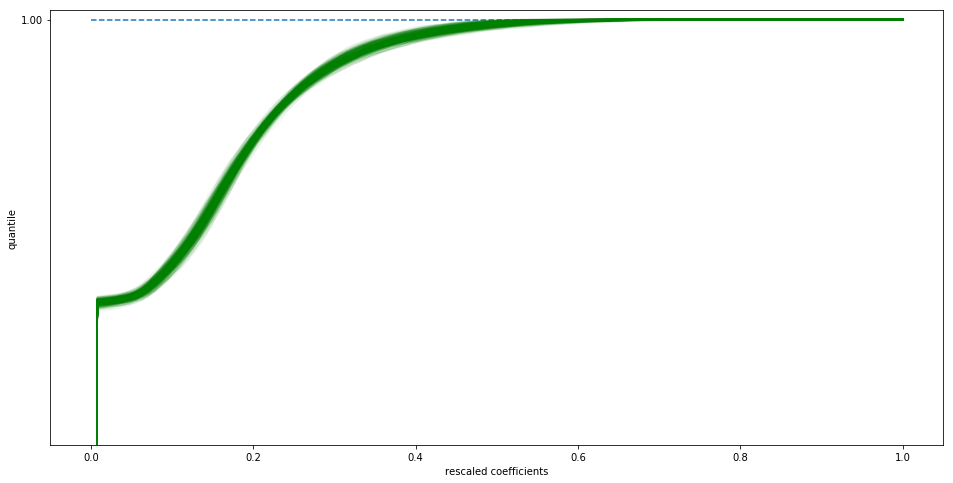

loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl
loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl


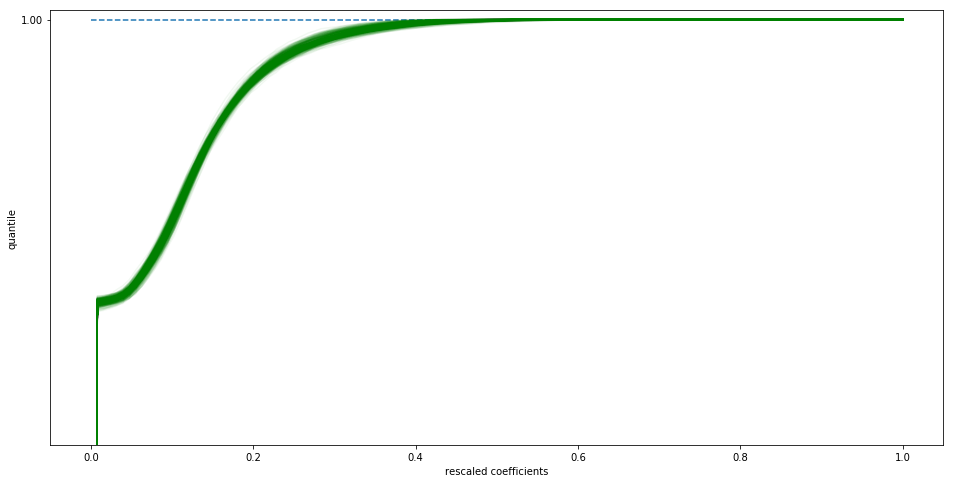

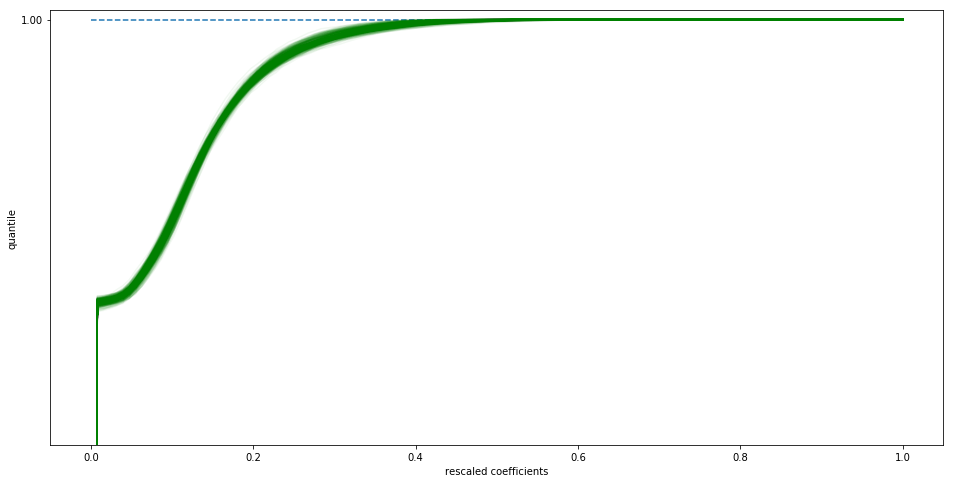

loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl


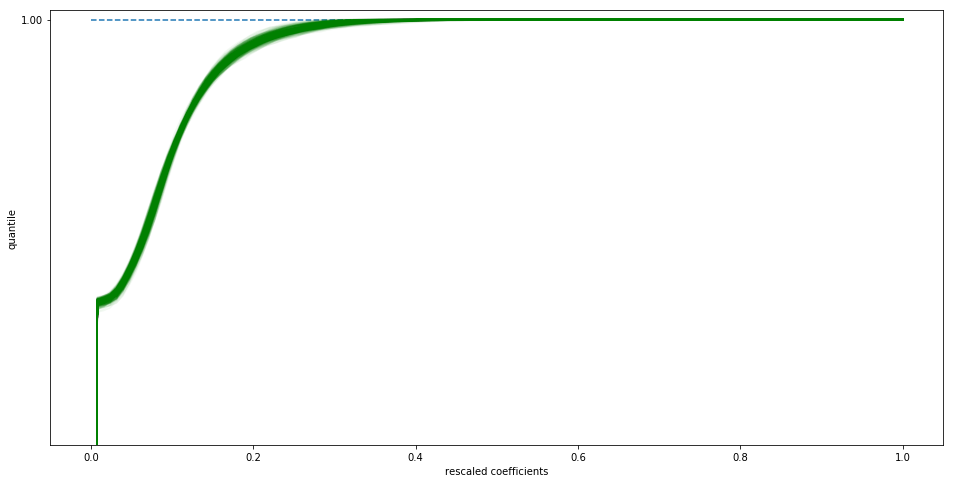

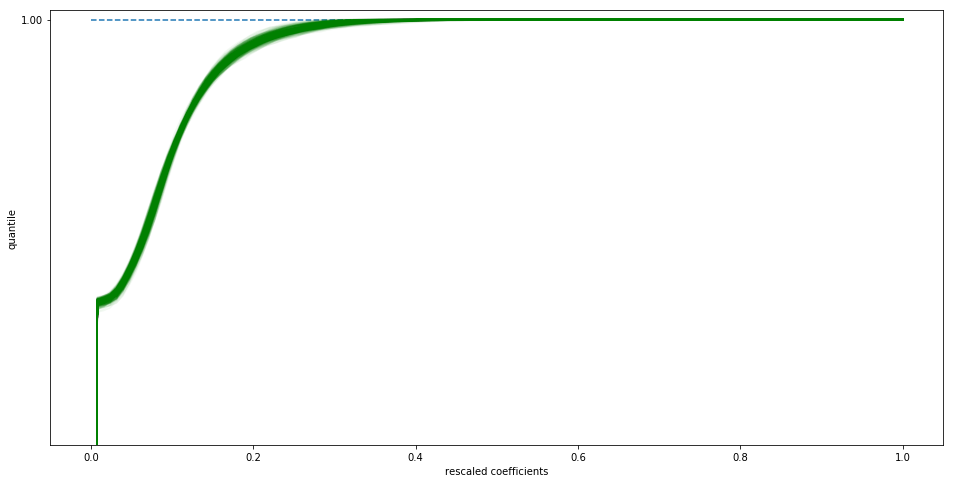

loading the dico called : cache_dir/rescaling - C=8.48528_dico.pkl
loading the dico called : cache_dir/rescaling - C=8.48528_dico.pkl


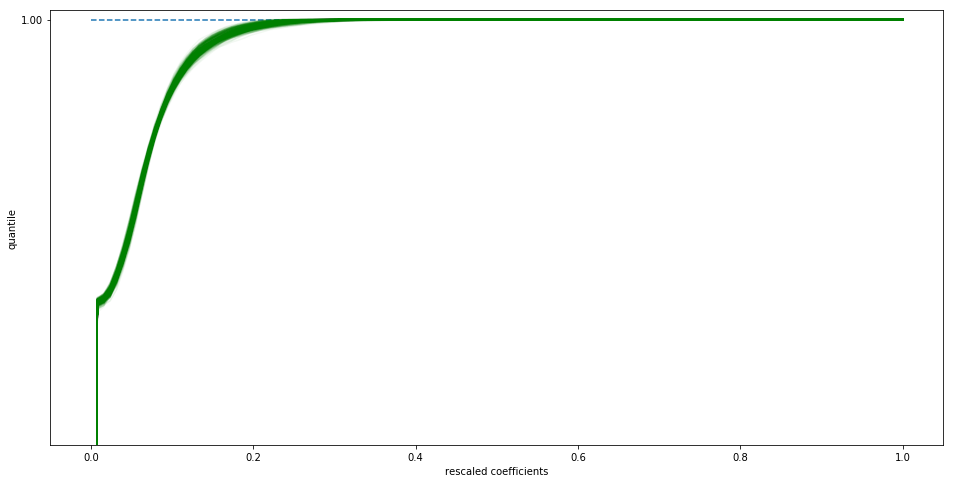

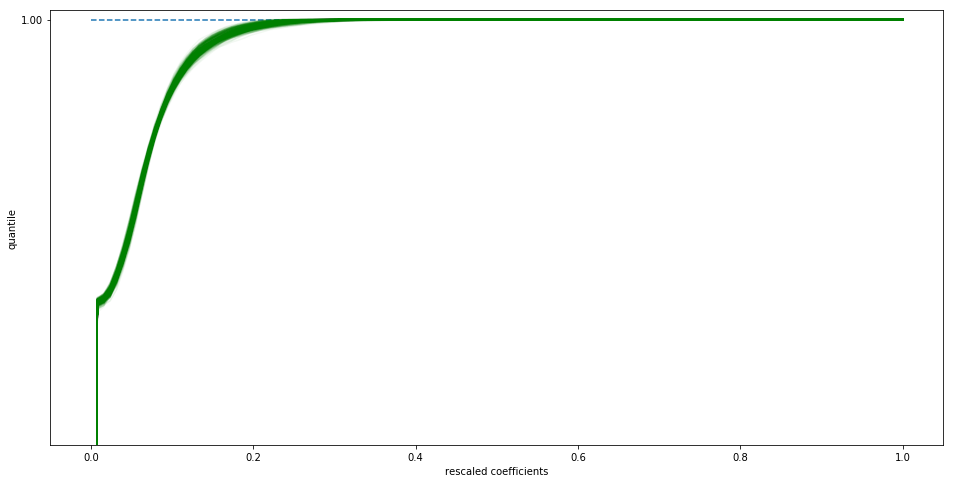

loading the dico called : cache_dir/rescaling - C=12.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=12.00000_dico.pkl


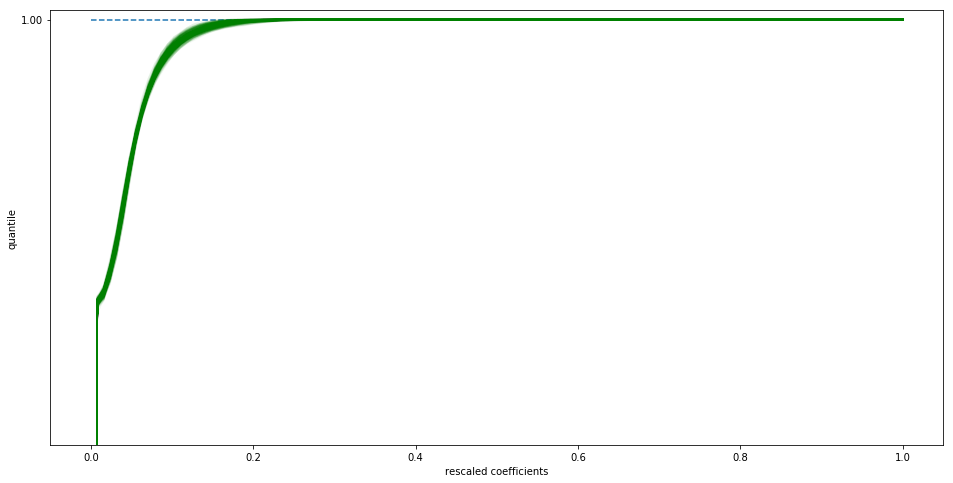

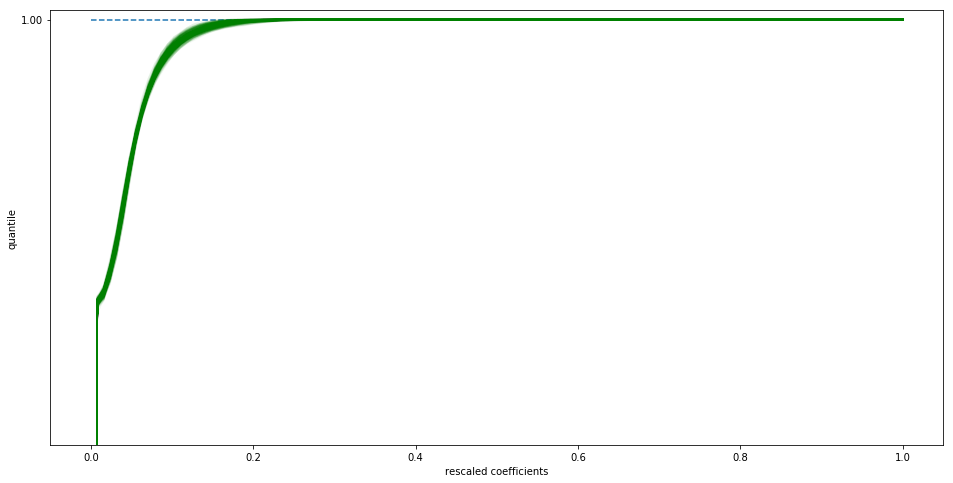

loading the dico called : cache_dir/rescaling - C=0.75000_dico.pkl
loading the dico called : cache_dir/rescaling - C=0.75000_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.50000_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.50000_dico.pkl
loading the dico called : cache_dir/rescaling - C=2.12132_dico.pkl
loading the dico called : cache_dir/rescaling - C=2.12132_dico.pkl
loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl
loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl
loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=8.48528_dico

loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=3.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl
loading the dico called : cache_dir/rescaling - C=4.24264_dico.pkl
loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=6.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=8.48528_dico.pkl
loading the dico called : cache_dir/rescaling - C=8.48528_dico.pkl
loading the dico called : cache_dir/rescaling - C=12.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=12.00000_dico.pkl
loading the dico called : cache_dir/rescaling - C=0.75000_dico.pkl
loading the dico called : cache_dir/rescaling - C=0.75000_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.06066_dico.pkl
loading the dico called : cache_dir/rescaling - C=1.50000_di

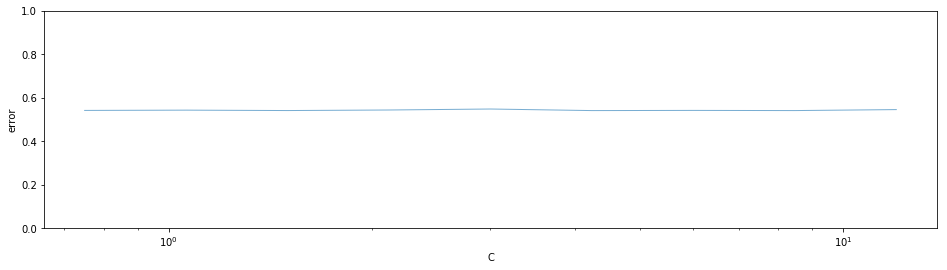

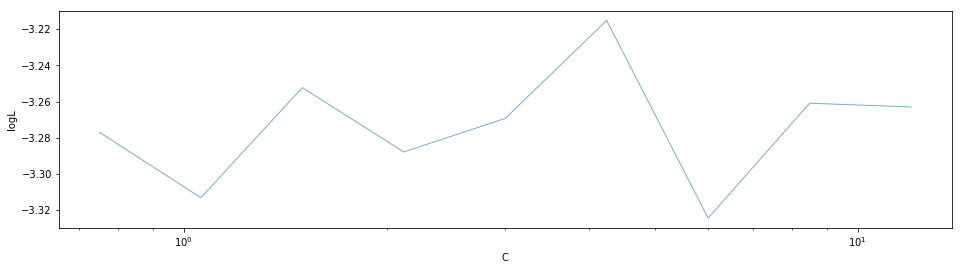

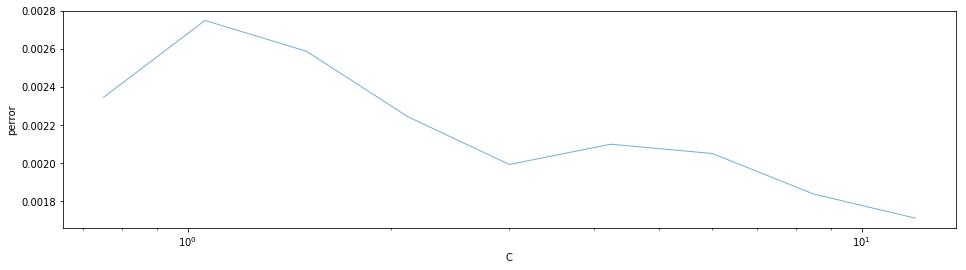

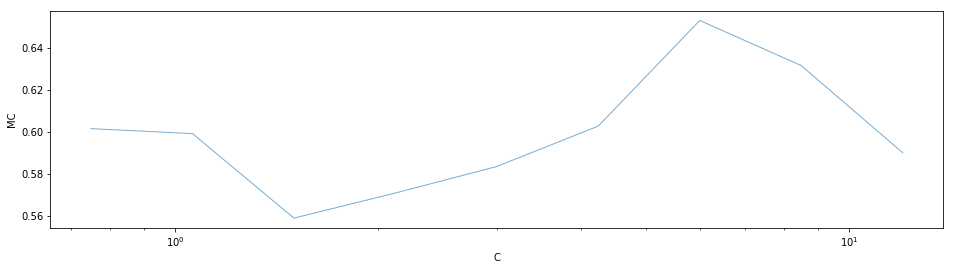

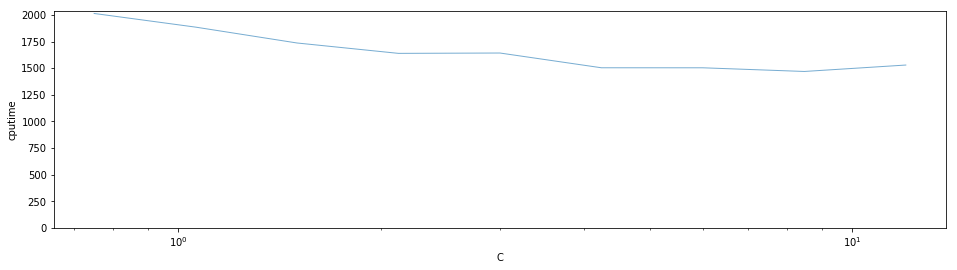

In [5]:
opts = dict(homeo_method='HEH', verbose=1)
experiments = SHL_set(opts, tag=tag)

experiments.scan(variable='C', list_figures=list_figures, display='')
plt.show()
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='C', list_figures=[], display='final', display_variable=display_variable)
    #plt.show()

## different quantization parameters

with a fixed $C$, we now change the number of quantization steps used to compute the histogram:

Extracting data..loading the data called : cache_dir/data_data
Data is of shape : (65520, 324) - done in 0.19s.
No cache found cache_dir/rescaling - nb_quant=32_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  33 /   1025 (elapsed time:  51s,   0mn  51s)
Iteration  65 /   1025 (elapsed time:  100s,   1mn  40s)
Iteration  97 /   1025 (elapsed time:  149s,   2mn  29s)
Iteration  129 /   1025 (elapsed time:  198s,   3mn  18s)
Iteration  161 /   1025 (elapsed time:  247s,   4mn   7s)
Iteration  193 /   1025 (elapsed time:  296s,   4mn  56s)
Iteration  225 /   1025 (elapsed time:  345s,   5mn  45s)
Iteration  257 /   1025 (elapsed time:  394s,   6mn  34s)
Iteration  289 /   1025 (elapsed time:  443s,   7mn  23s)
Iteration  321 /   1025 (elapsed time:  492s,   8mn  12s)
Iteration  353 /   1025 (elapsed time:  541s,   9mn   1s)
Iteration  385 /   1025 (elapsed time:  590s,   9mn  50s

Iteration  769 /   1025 (elapsed time:  1087s,  18mn   7s)
Iteration  801 /   1025 (elapsed time:  1131s,  18mn  51s)
Iteration  833 /   1025 (elapsed time:  1177s,  19mn  37s)
Iteration  865 /   1025 (elapsed time:  1222s,  20mn  22s)
Iteration  897 /   1025 (elapsed time:  1267s,  21mn   7s)
Iteration  929 /   1025 (elapsed time:  1312s,  21mn  52s)
Iteration  961 /   1025 (elapsed time:  1357s,  22mn  37s)
Iteration  993 /   1025 (elapsed time:  1402s,  23mn  22s)
Iteration  1025 /   1025 (elapsed time:  1448s,  24mn   8s)
done in 1451.28s.
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
No cache found cache_dir/rescaling - nb_quant=181_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  33 /   1025 (elapsed time:  47s,   0mn  47s)
Iteration  65 /   1025 (elapsed time:  92s,   1mn  32s)
Iteration  97 /   1025 (elapsed time:  137s,   2mn  17s)
Iteration  1

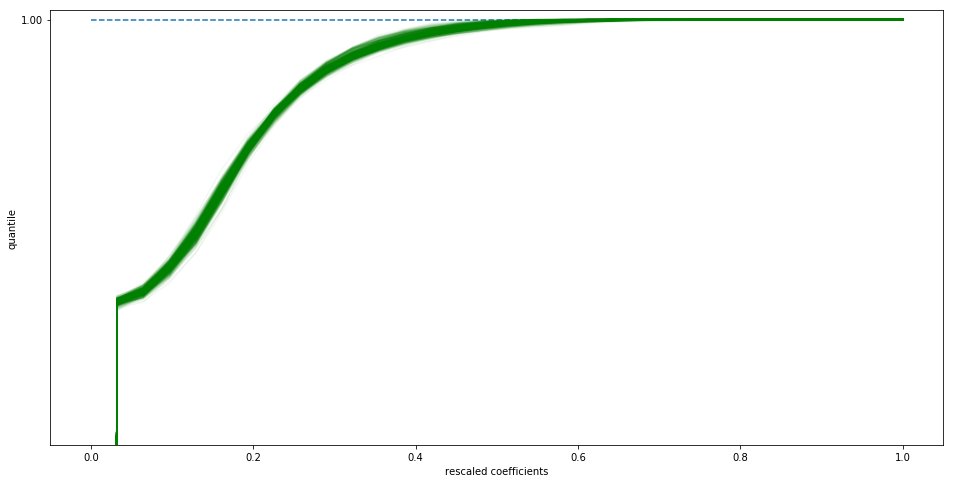

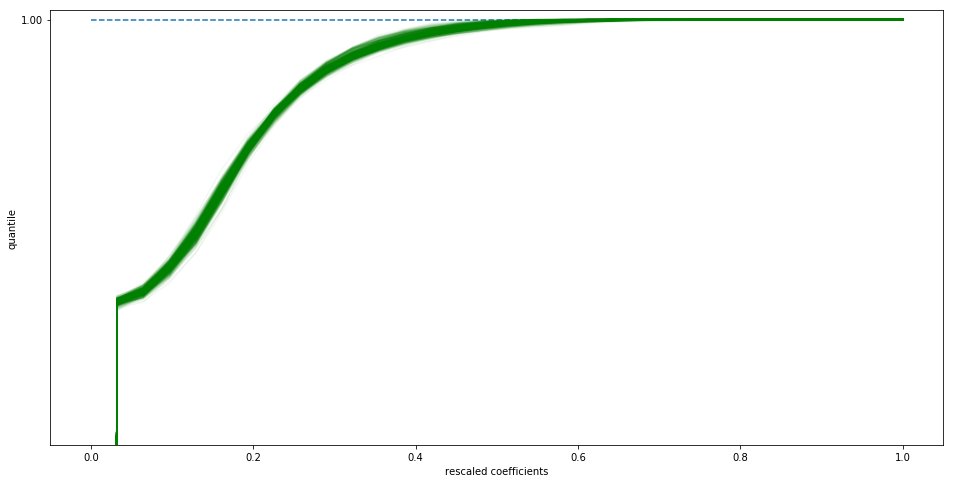

loading the dico called : cache_dir/rescaling - nb_quant=45_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=45_dico.pkl


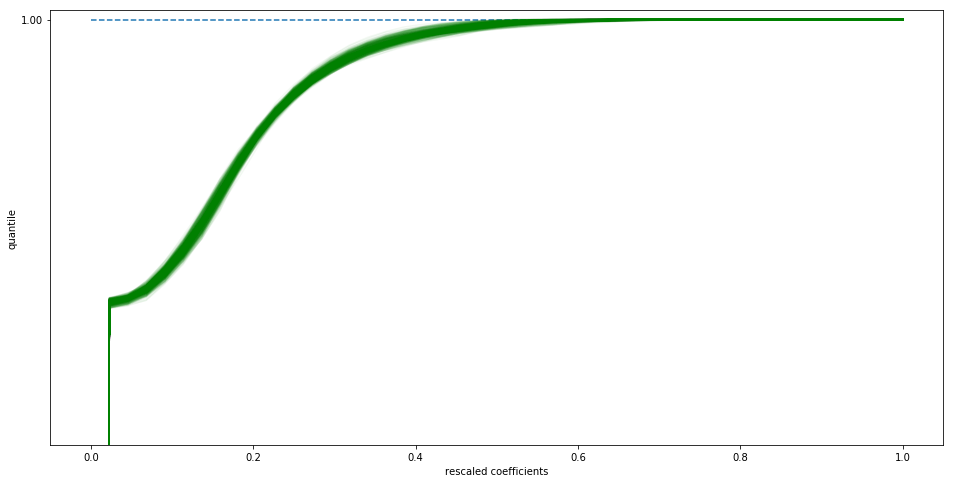

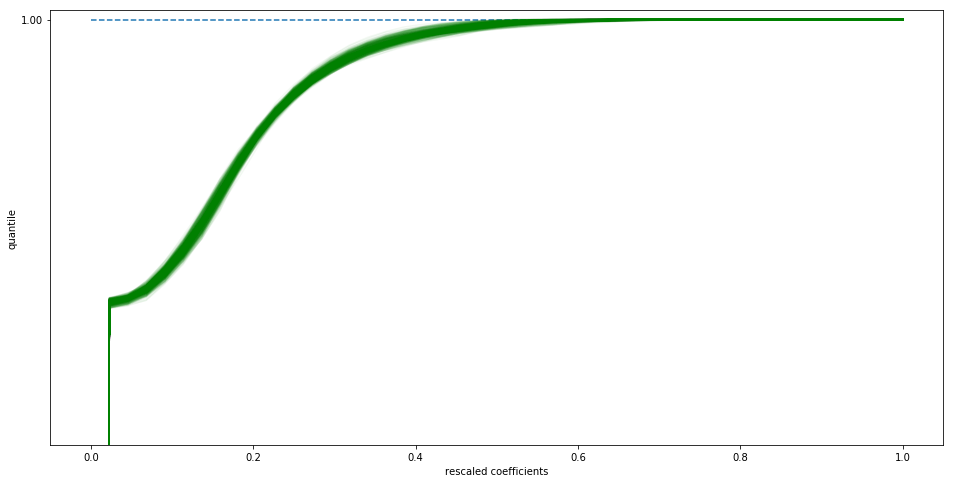

loading the dico called : cache_dir/rescaling - nb_quant=64_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=64_dico.pkl


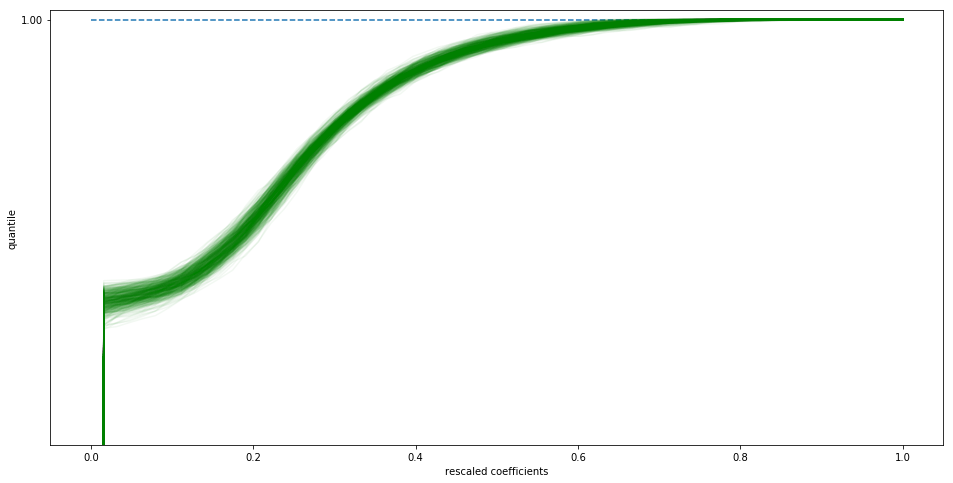

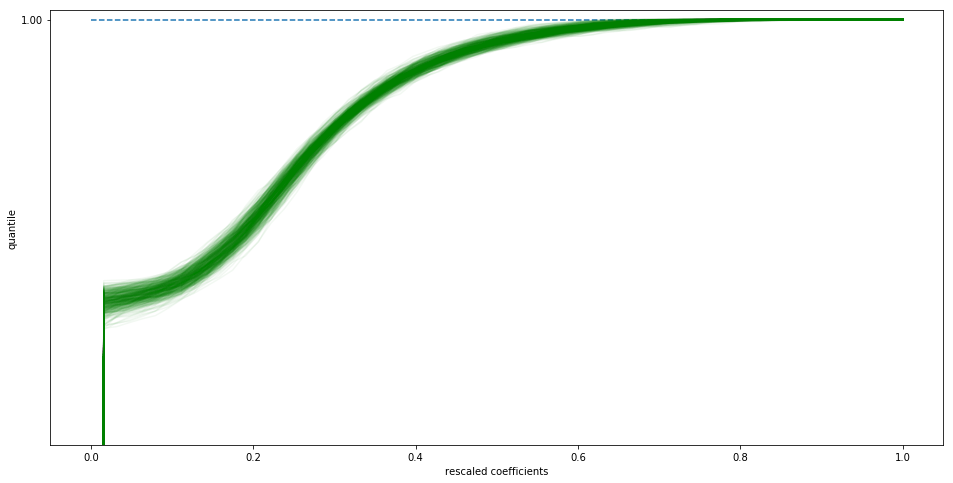

loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl


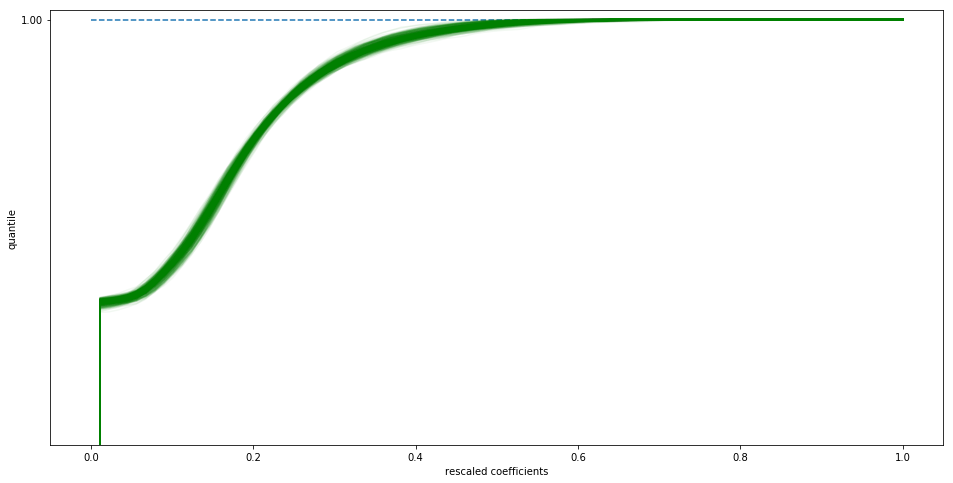

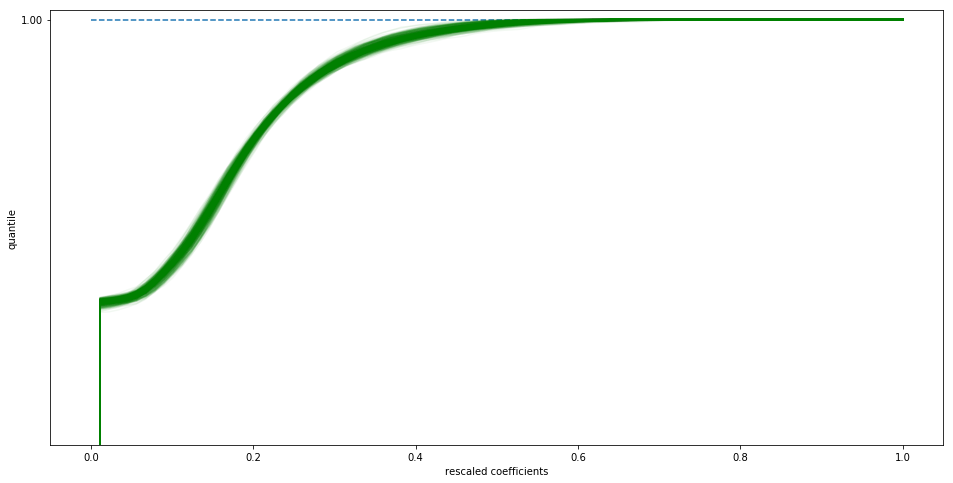

loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl


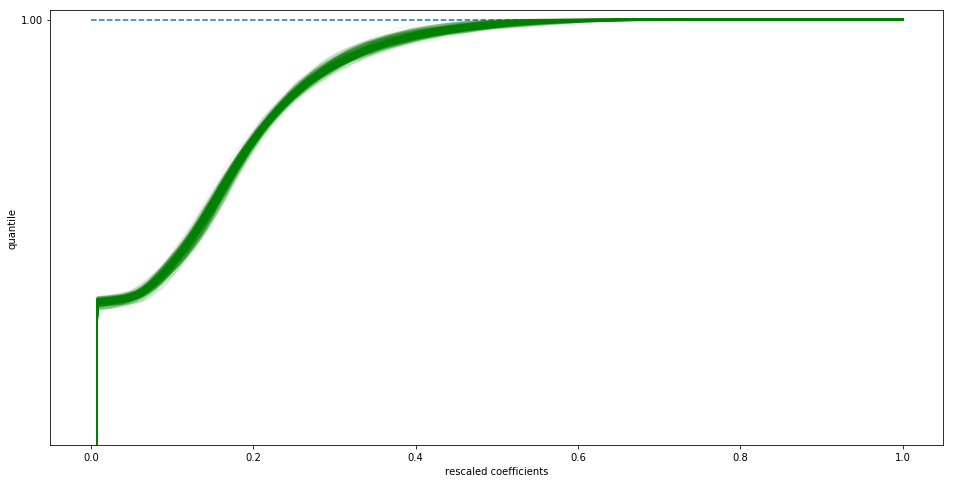

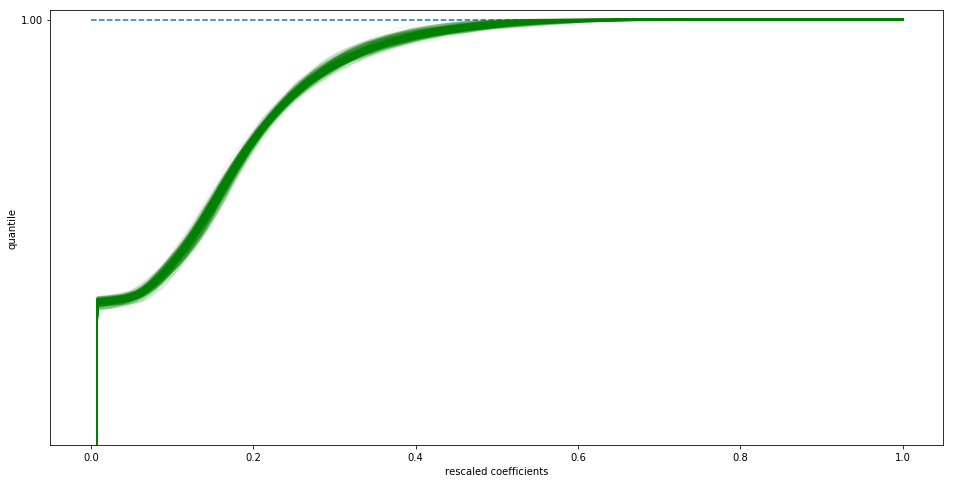

loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl


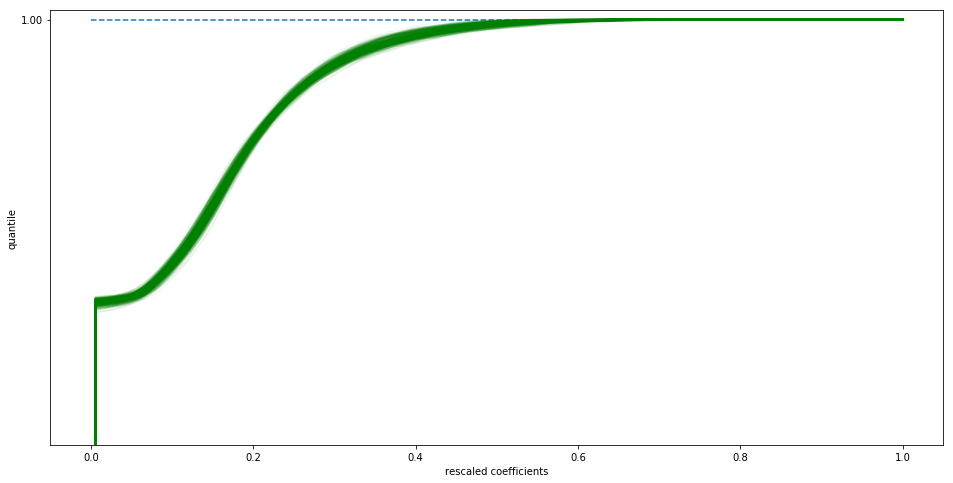

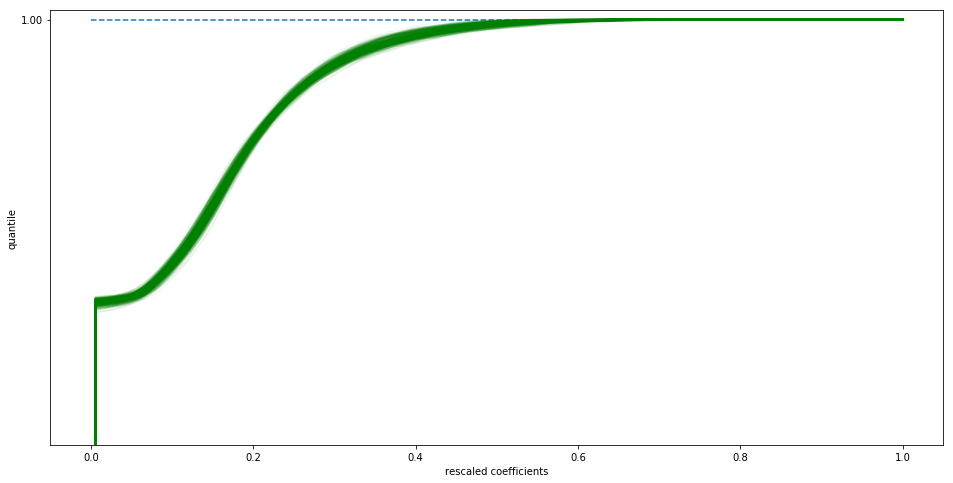

loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl


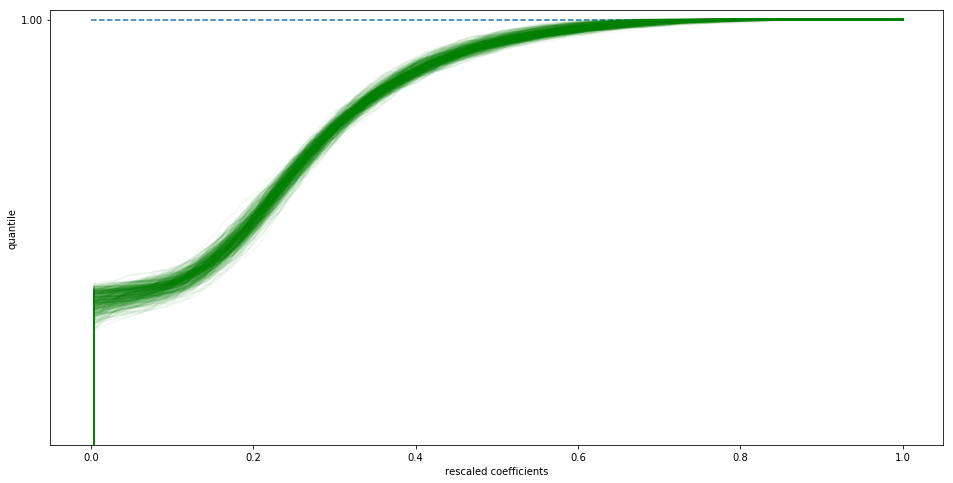

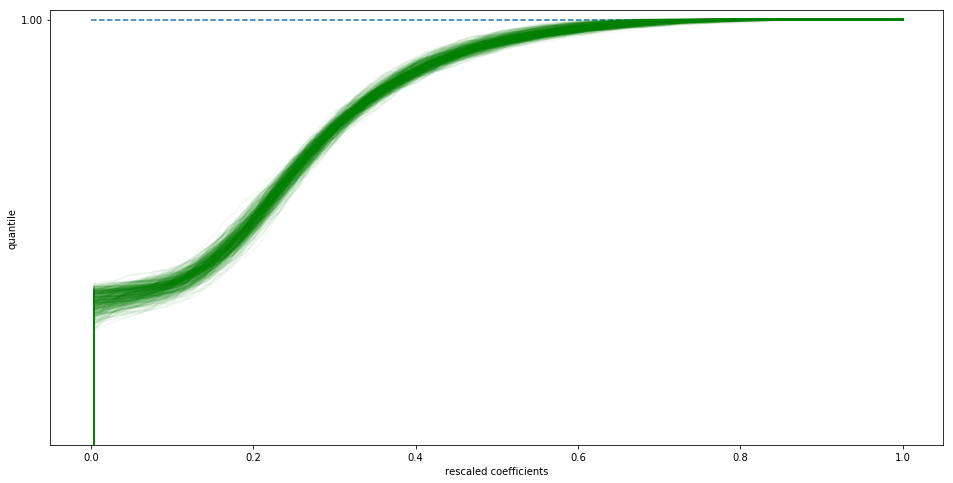

loading the dico called : cache_dir/rescaling - nb_quant=362_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=362_dico.pkl


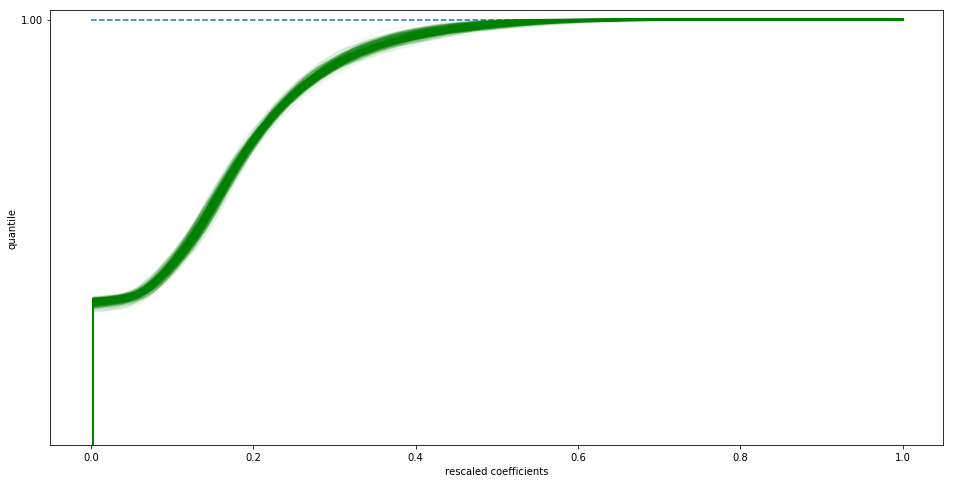

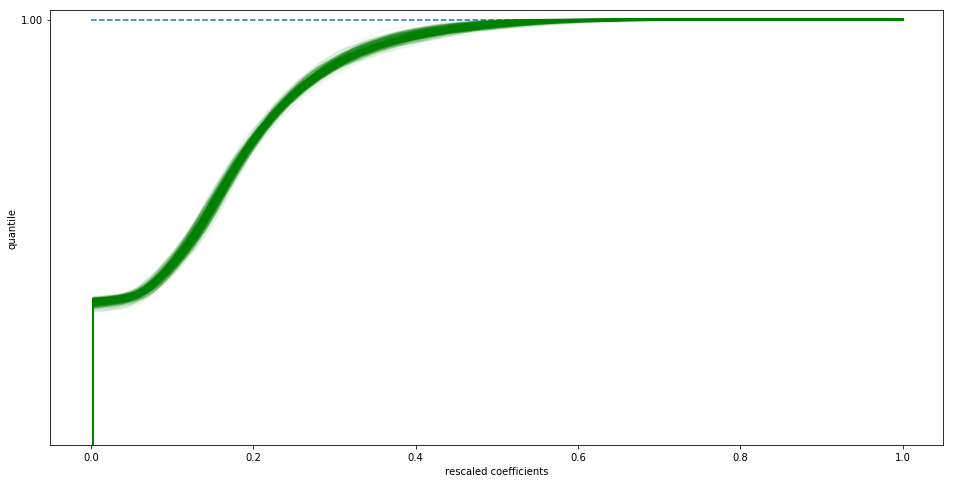

loading the dico called : cache_dir/rescaling - nb_quant=512_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=512_dico.pkl


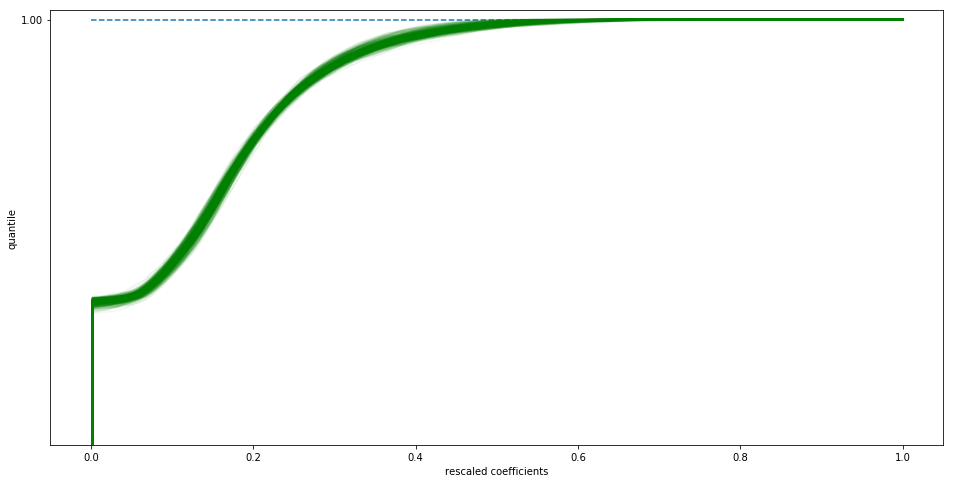

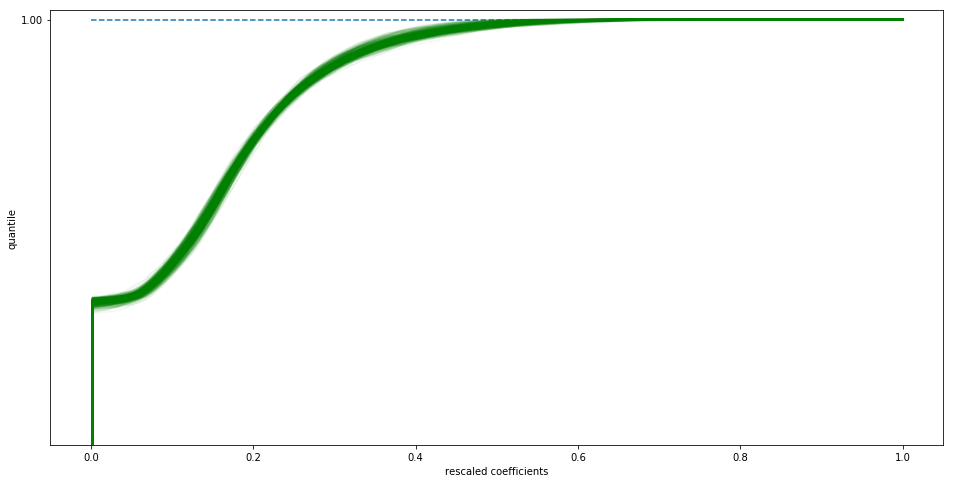

loading the dico called : cache_dir/rescaling - nb_quant=32_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=32_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=45_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=45_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=64_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=64_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl
loading the dico called : ca

loading the dico called : cache_dir/rescaling - nb_quant=64_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=90_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=128_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=181_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=256_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=362_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=362_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=512_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=512_dico.pkl
loading the dico called : cache_dir/rescaling - nb_quant=32_dico.pkl
loading the dico called 

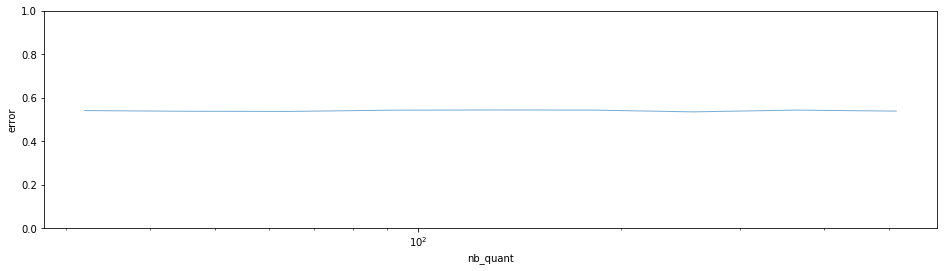

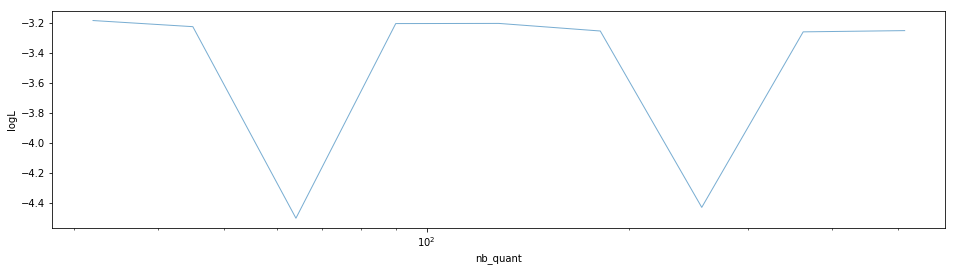

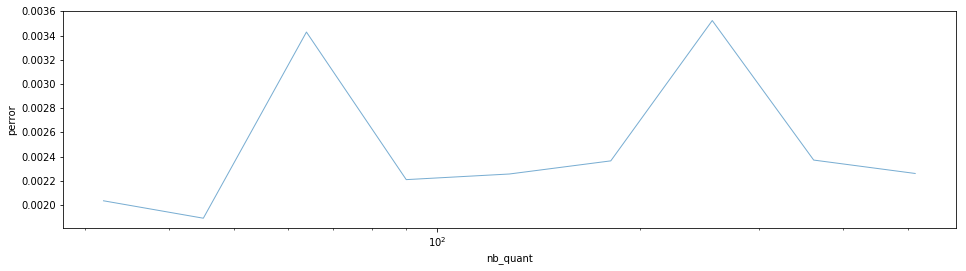

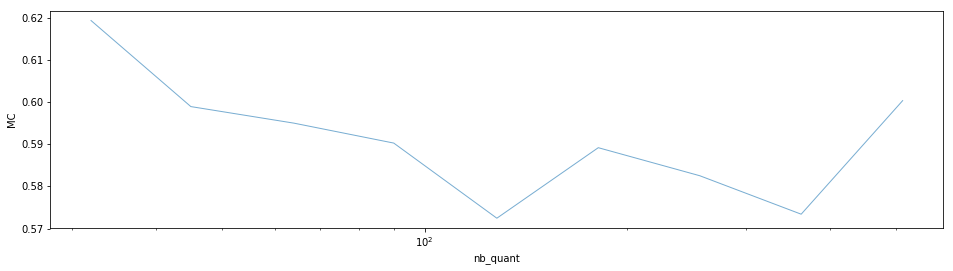

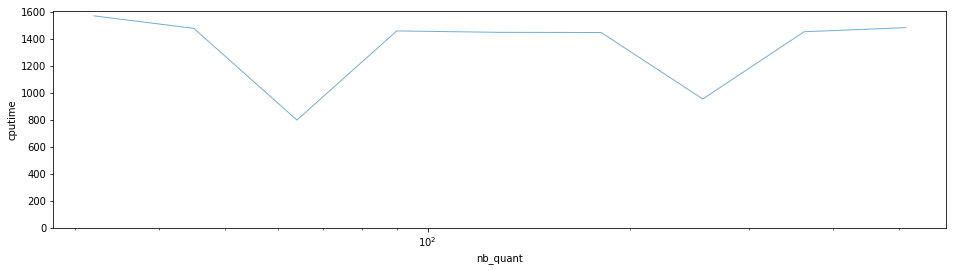

In [6]:
opts = dict(homeo_method='HEH', verbose=1)
experiments = SHL_set(opts, tag=tag)

experiments.scan(variable='nb_quant', list_figures=list_figures, display='')
plt.show()
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='nb_quant', list_figures=[], display='final', display_variable=display_variable)
    #plt.show()

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Fri Sep 07 22:24:18 2018 CEST